[Problem 1] Understanding the content of the competition

What kind of company is Home Credit?
  home credit is an angel investor that aims to serve the bottom underclass of society.
What is expected in this competition?
  participant of this competition are expected to help Home credit unlock the full potential of the data using statistical and machine learning methods. specifically, they are challenged to improve the accuracy of assessing client's repayment abilities and to optimize loan terms to empower clients for success.
What are the benefits companies can gain by predicting this?
  -Providing loans to the unbanked.
  -Creating upward financial mobility for bottom class of society.
  -increasing the ability of customers to repay loan.

[Problem 2] Understanding the overview of data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
application = pd.read_csv("application_train.csv.zip")

In [7]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
total = application.isnull().sum().sort_values(ascending=False)
percent = (total/application.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963


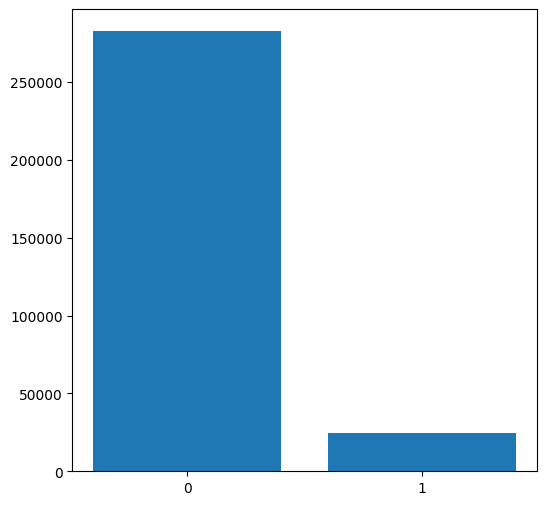

In [19]:
import numpy as np
import matplotlib.pyplot as plt
temp = application["TARGET"].value_counts()
y_pos = np.arange(len(temp.values))
plt.figure(figsize =(6,6))
plt.bar(y_pos, temp.values)
plt.xticks(y_pos, temp.index)
plt.show()

[Problem 3] Defining issues

1. What is the gender ration of loan apllications and that of successful repayment?
2. what are ages of clients and how does it relate to repayment on time?
3. which type of loan did theclient take?
4. what is the education level of the client?
does the client own a car?
5. does the client own a car?

[Problem 4] Data exploration

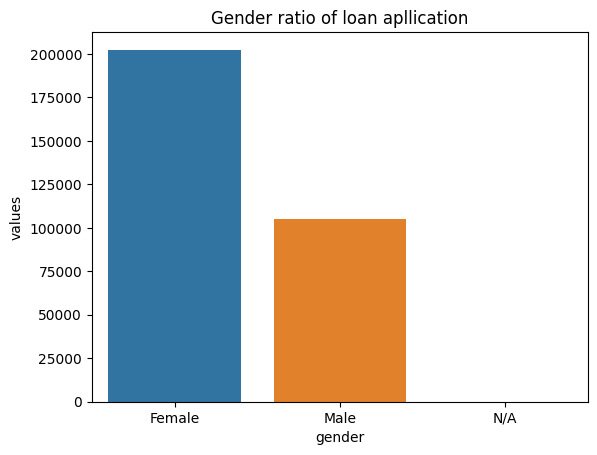

In [20]:
gender = application['CODE_GENDER'].value_counts()
df = pd.DataFrame({'gender': ['Female','Male',"N/A"], 'values': gender.values})
plt.title('Gender ratio of loan apllication')
sns.barplot(x = 'gender', y="values", data = df)
plt.show()

In [23]:
male = application.loc[:,'CODE_GENDER'][application.loc[:, 'CODE_GENDER'] =='M']
female = application.loc[:,'CODE_GENDER'][application.loc[:, 'CODE_GENDER'] =='F']

In [27]:
male_unpaid = application.loc[((application['TARGET'] == 1) & (application['CODE_GENDER'] =='M'))]
female_unpaid = application.loc[((application['TARGET'] == 1) & (application['CODE_GENDER'] =='F'))]

In [28]:
male_paid = len(male) - len(male_unpaid)
female_paid = len(female) - len(female_unpaid)

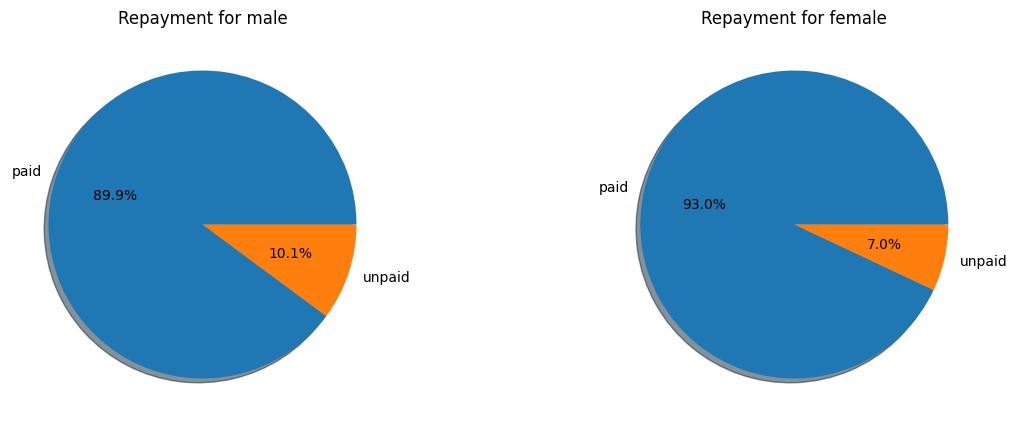

In [32]:
labels = 'paid', 'unpaid'
samplesM = [male_paid, len(male_unpaid)]
samplesF = [female_paid, len(female_unpaid)]
fig, axes = plt.subplots(1, 2)
axes[0].pie(samplesM, labels=labels, autopct='%1.1f%%', shadow=True)
axes[0].set_title('Repayment for male')
axes[1].pie(samplesF, labels=labels, autopct='%1.1f%%', shadow=True)
axes[1].set_title('Repayment for female')
fig.set_size_inches(14, 5)
plt.show()

what are ages of clients and how does it relate to repayment on time?

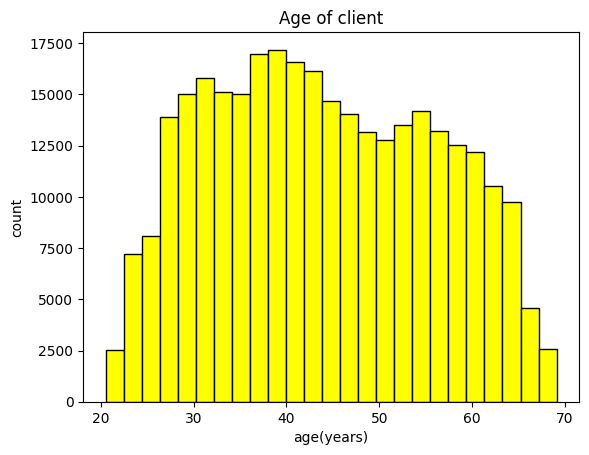

In [34]:
plt.hist(application['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25, color='yellow')
plt.title('Age of client')
plt.xlabel('age(years)')
plt.ylabel('count')
plt.show()

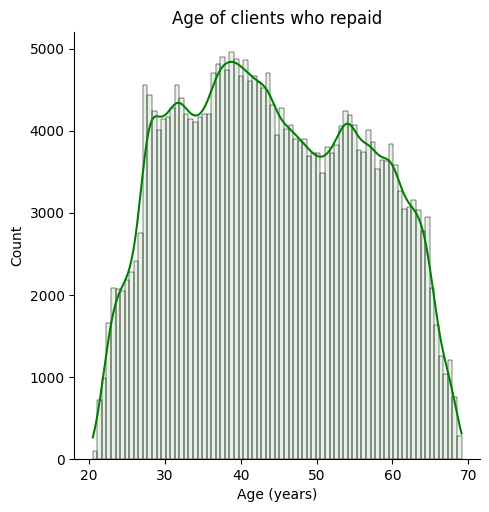

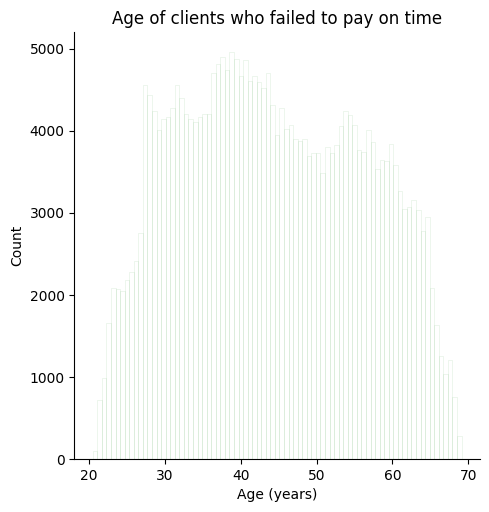

In [37]:
age_paid = application.loc[application['TARGET'] == 0, 'DAYS_BIRTH'] / -365
age_unpaid = application.loc[application['TARGET'] == 1, 'DAYS_BIRTH'] / -365
sns.displot(age_paid,color='green',alpha=0.1, kde= True)
plt.xlabel('Age (years)')
plt.title('Age of clients who repaid')
sns.displot(age_paid,color='green',alpha=0.1, fill= False)
plt.xlabel('Age (years)')
plt.title('Age of clients who failed to pay on time')

plt.show()

In [42]:
def barplot(feature, name, title):
  f=application[feature].value_counts()
  df = pd.DataFrame({name:f.index, 'values': f.values})
  plt.title(title)
  sns.barplot(x = name, y="values", data =df)
  fig = plt.gcf()
  fig.set_size_inches(12, 5)
  plt.show()

In [45]:
def stats(features):
  percentage = application[[features, 'TARGET']].groupby([features],as_index=False).mean().round(3)
  percentage.sort_values(by='TARGET',ascending=False, inplace=True)
  return percentage

4. what is the education level of the client?

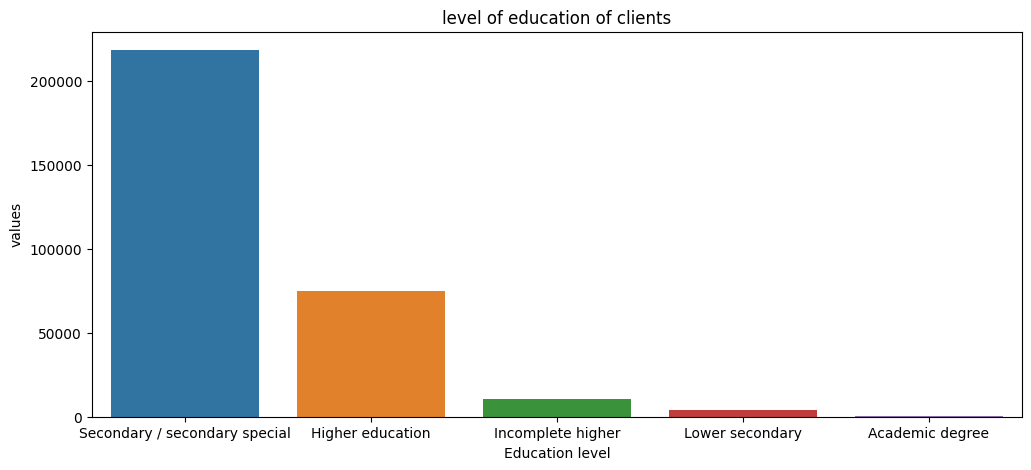

In [43]:
barplot('NAME_EDUCATION_TYPE', 'Education level', 'level of education of clients')

In [46]:
stats('NAME_EDUCATION_TYPE')

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109
4,Secondary / secondary special,0.089
2,Incomplete higher,0.085
1,Higher education,0.054
0,Academic degree,0.018


# 5. [Problem 5] (Advanced task) Posting to Notebooks